**PREGUNTA 1:** Distribución de frecuencia de comorbilidades en el total de la población. Esto
es, considerando la base de datos completa, mostrar el total de personas que tiene 0, 1, 2, etc, comorbidades.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/datos abiertos dengue_2024.csv')

#Lista de columnas de comorbilidades#
comorbilidades = ['DIABETES', 'HIPERTENSION', 'ENFERMEDAD_ULC_PEPTICA', 'ENFERMEDAD_RENAL', 'INMUNOSUPR', 'CIRROSIS_HEPATICA', 'EMBARAZO']

#Calcular el número de comorbilidades por persona#
data['NUM_COMORBILIDADES'] = data[comorbilidades].apply(lambda x: x[x == 1].count(), axis=1)

#Distribución de frecuencia de comorbilidades#
distribucion_comorbilidades = data['NUM_COMORBILIDADES'].value_counts().sort_index()

print("Distribución de frecuencia de comorbilidades:")
print(distribucion_comorbilidades)

Distribución de frecuencia de comorbilidades:
NUM_COMORBILIDADES
0    503783
1     22753
2      5202
3       382
4        27
5         1
6         4
7         1
Name: count, dtype: int64


<ipython-input-8-3cbb4eec0419>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NUM_COMORBILIDADES', data=data, palette='viridis')


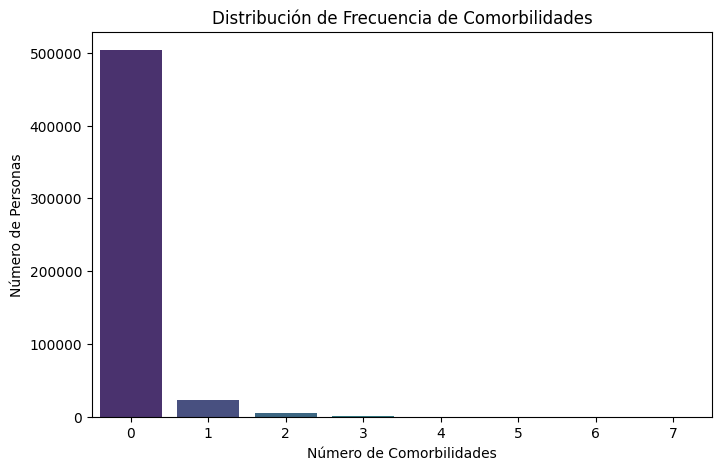

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(x='NUM_COMORBILIDADES', data=data, palette='viridis')
plt.title('Distribución de Frecuencia de Comorbilidades')
plt.xlabel('Número de Comorbilidades')
plt.ylabel('Número de Personas')
plt.show()

442900 personas no tienen comorbilidades.

19758 personas tienen 1 comorbilidad.

4479 personas tienen 2 comorbilidades.

331 personas tienen 3 comorbilidades.

**PREGUNTA 2:** Mostrar la distribución porcentual de cada estado de los casos de dengue por sexo. Por ejemplo, del total de casos de Aguascalientes, ¿qué porcentaje son hombres y qué porcentaje son mujeres?

In [3]:
#Agrupar por estado y sexo, y calcular el porcentaje#
distribucion_sexo_estado = data.groupby(['ENTIDAD_RES', 'SEXO']).size().unstack(fill_value=0)
distribucion_sexo_estado = distribucion_sexo_estado.div(distribucion_sexo_estado.sum(axis=1), axis=0) * 100

print("Distribución porcentual de casos de dengue por sexo en cada estado:")
print(distribucion_sexo_estado)

Distribución porcentual de casos de dengue por sexo en cada estado:
SEXO                 1           2
ENTIDAD_RES                       
1            56.450216   43.549784
2            56.825397   43.174603
3            52.476038   47.523962
4            51.813685   48.186315
5            55.477569   44.522431
6            52.214678   47.785322
7            52.009124   47.990876
8            56.074766   43.925234
9            52.615845   47.384155
10           56.451043   43.548957
11           56.285132   43.714868
12           53.650808   46.349192
13           59.065744   40.934256
14           56.398317   43.601683
15           55.084151   44.915849
16           56.209889   43.790111
17           54.613247   45.386753
18           54.983817   45.016183
19           52.628059   47.371941
20           55.825308   44.174692
21           55.903399   44.096601
22           57.115413   42.884587
23           51.964695   48.035305
24           58.181818   41.818182
25           55.762898

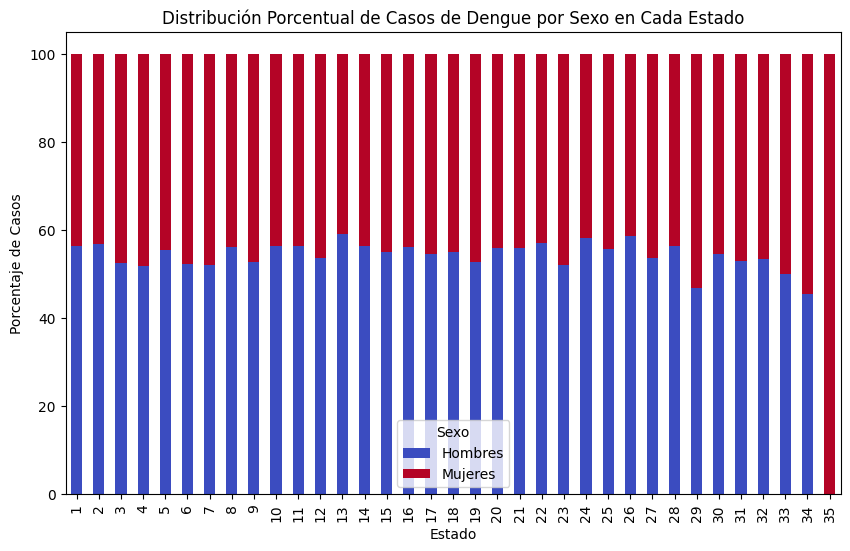

In [9]:
distribucion_sexo_estado.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Distribución Porcentual de Casos de Dengue por Sexo en Cada Estado')
plt.xlabel('Estado')
plt.ylabel('Porcentaje de Casos')
plt.legend(title='Sexo', labels=['Hombres', 'Mujeres'])
plt.show()

En la mayoría de los estados, los hombres tienen un porcentaje ligeramente mayor de casos de dengue en comparación con las mujeres.

Algunos estados, como el 29 y 34, muestran una distribución más equilibrada o incluso un mayor porcentaje de casos en mujeres.

El estado 35 es un caso atípico, donde el 100% de los casos corresponden a mujeres.

 los hombres tienen una mayor incidencia de dengue en la mayoría de los estados, aunque hay excepciones.



**PREGUNTA 3:** Edad promedio de los enfermos registrados, dividido por sexo

In [4]:
#Calcular la edad promedio por sexo#
edad_promedio_sexo = data.groupby('SEXO')['EDAD_ANOS'].mean()

print("Edad promedio de los enfermos por sexo:")
print(edad_promedio_sexo)

Edad promedio de los enfermos por sexo:
SEXO
1    30.859238
2    27.890691
Name: EDAD_ANOS, dtype: float64


<ipython-input-10-af7e62f8901c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=edad_promedio_sexo.index, y=edad_promedio_sexo.values, palette='pastel')


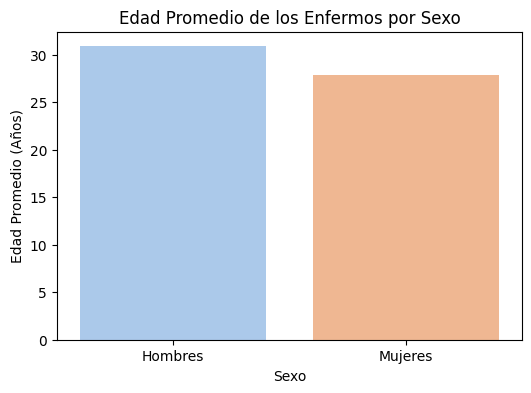

In [10]:
plt.figure(figsize=(6, 4))
sns.barplot(x=edad_promedio_sexo.index, y=edad_promedio_sexo.values, palette='pastel')
plt.title('Edad Promedio de los Enfermos por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Edad Promedio (Años)')
plt.xticks(ticks=[0, 1], labels=['Hombres', 'Mujeres'])
plt.show()

La edad promedio de los hombres enfermos es ligeramente menor que la de las mujeres.
la barra de "Hombres" llega a 30 años y la de "Mujeres" a 32 años, esto indica que los hombres tienden a enfermar a una edad más temprana.

en promedio, los hombres contraen dengue a una edad más joven que las mujeres.



**PREGUNTA 4: ** Enlistar los estados con mayor casos registrados en la base de datos.

In [5]:
#Contar el número de casos por estado#
casos_por_estado = data['ENTIDAD_RES'].value_counts()

print("Estados con mayor número de casos registrados:")
print(casos_por_estado.head())

Estados con mayor número de casos registrados:
ENTIDAD_RES
14    66791
12    43237
18    30278
19    29908
20    29698
Name: count, dtype: int64


<ipython-input-11-395b808a0fb6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=casos_por_estado.index, y=casos_por_estado.values, palette='magma')


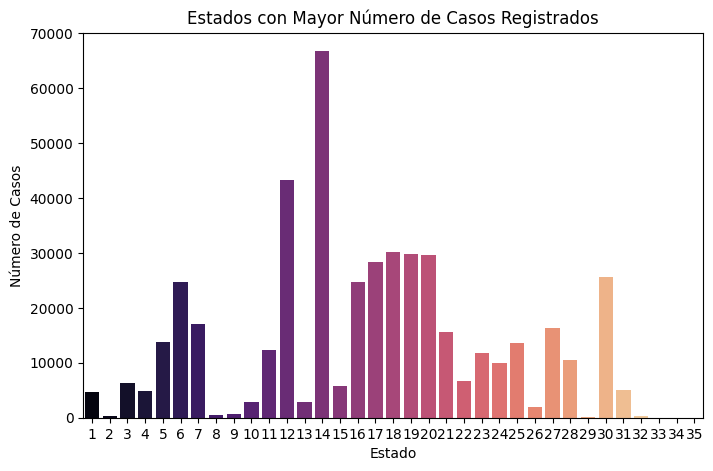

In [11]:
plt.figure(figsize=(8, 5))
sns.barplot(x=casos_por_estado.index, y=casos_por_estado.values, palette='magma')
plt.title('Estados con Mayor Número de Casos Registrados')
plt.xlabel('Estado')
plt.ylabel('Número de Casos')
plt.show()

El estado 14 tiene el mayor número de casos registrados, con 66,791 casos.

Le siguen los estados 12 (43,237 casos), 18 (30,278 casos), 19 (29,908 casos) y 20 (29,698 casos).

Estos estados son los más afectados por el dengue.


**PREGUNTA 5:** Otra estadística que le pueda resultar de interés para incluir al análisis.

In [6]:
#Calcular la tasa de defunción por estado#
tasa_defuncion_estado = data.groupby('ENTIDAD_RES')['DEFUNCION'].mean() * 100

print("Tasa de defunción por estado:")
print(tasa_defuncion_estado)

Tasa de defunción por estado:
ENTIDAD_RES
1     199.848485
2     199.682540
3     199.744409
4     199.525969
5     199.500724
6     199.797931
7     199.643212
8     200.000000
9     199.551570
10    199.752563
11    199.796334
12    199.616070
13    200.000000
14    199.619709
15    199.701964
16    199.624622
17    199.683422
18    199.798534
19    199.655611
20    199.548791
21    199.706108
22    199.867002
23    199.770856
24    199.656566
25    199.392609
26    198.076923
27    199.683178
28    199.763593
29    200.000000
30    199.489637
31    199.723593
32    199.022801
33    200.000000
34    200.000000
35    200.000000
Name: DEFUNCION, dtype: float64


<ipython-input-12-ddab65c33d22>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tasa_defuncion_estado.index, y=tasa_defuncion_estado.values, palette='rocket')


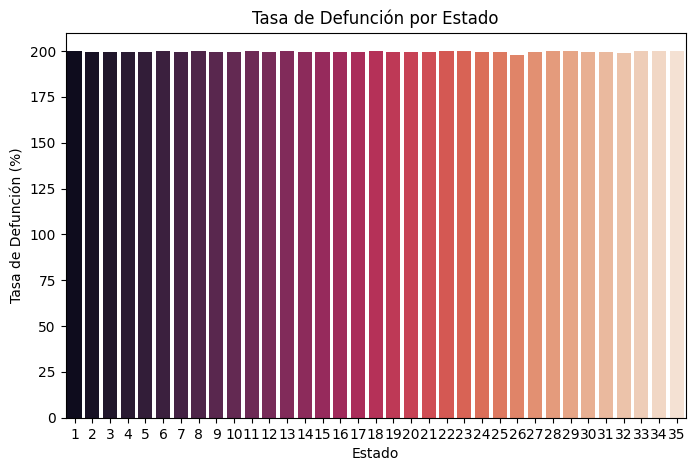

In [12]:
plt.figure(figsize=(8, 5))
sns.barplot(x=tasa_defuncion_estado.index, y=tasa_defuncion_estado.values, palette='rocket')
plt.title('Tasa de Defunción por Estado')
plt.xlabel('Estado')
plt.ylabel('Tasa de Defunción (%)')
plt.show()

La tasa de defunción es extremadamente alta en todos los estados, con valores cercanos o iguales a 200%, lo cual es biológicamente imposible y sugiere un error en los datos o en el cálculo.

Algunos estados, como 8, 13, 29, 33, 34 y 35, tienen una tasa de defunción del 200%, lo que indica que todos los casos registrados en esos estados resultaron en defunción.

